# 연습문제(2) 

## #01. 작업준비

### 패키지 가져오기

In [63]:
import sys
import os
import numpy as np
import seaborn as sb
from pandas import DataFrame, read_excel, pivot_table, crosstab
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

### 직접 만든 모듈의 위치(폴더)를 파이썬에 등록

In [8]:
# helper.py 파일이 존재하는 폴더 위치를 파이썬 라이브러리 경로에 추가
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

#### 직접 만든 모듈 참조

In [9]:
from helper import setCategory

### 데이터 불러오기

In [10]:
df = read_excel('https://data.hossam.kr/D02/wage.xlsx')
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


## 문제 1, 2

데이터를 로드하여 명목형 변수를 1, 2 등으로 레이블링 하시오. 값의 종류는 데이터프레임으로부터 조회하여 확인하시오.

레이블링 된 명목형 변수를 category 타입으로 변경하시오.

### 명목형 변수 처리 및 라벨링

#### 데이터의 유형

In [4]:
df.dtypes

year            int64
age             int64
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

In [5]:
ilist = list(df.dtypes.index)
ilist

['year',
 'age',
 'maritl',
 'race',
 'education',
 'region',
 'jobclass',
 'health',
 'health_ins',
 'logwage',
 'wage']

#### 특정 변수의 데이터 종류 파악

In [6]:
vlist = list(df.dtypes.values)
vlist

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64')]

In [11]:
cdf = df.copy()
for i, v in enumerate(vlist):
    if v == 'object':
        field_name = ilist[i]
        #print(field_name)

        vc = cdf[field_name].value_counts()
        #print(vc)

        for ii, vv in enumerate(list(vc.index)):
            p = vv.find(".")
            vnum = int(vv[:p])
            print(vv, " -->", vnum)

            cdf.loc[cdf[field_name] == vv, field_name] = vnum

        cdf[field_name] = cdf[field_name].astype('category')

        print("-" * 30)

cdf

2. Married  --> 2
1. Never Married  --> 1
4. Divorced  --> 4
5. Separated  --> 5
3. Widowed  --> 3
------------------------------
1. White  --> 1
2. Black  --> 2
3. Asian  --> 3
4. Other  --> 4
------------------------------
2. HS Grad  --> 2
4. College Grad  --> 4
3. Some College  --> 3
5. Advanced Degree  --> 5
1. < HS Grad  --> 1
------------------------------
2. Middle Atlantic  --> 2
------------------------------
1. Industrial  --> 1
2. Information  --> 2
------------------------------
2. >=Very Good  --> 2
1. <=Good  --> 1
------------------------------
1. Yes  --> 1
2. No  --> 2
------------------------------


,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1,1,2,1,1,2,4.318063,75.043154
1,2004,24,1,1,4,2,2,2,2,4.255273,70.476020
2,2003,45,2,1,3,2,1,1,1,4.875061,130.982177
3,2003,43,2,3,4,2,2,2,1,5.041393,154.685293
4,2005,50,4,1,2,2,2,1,1,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,3,2,1,2,1,5.041393,154.685293
2996,2007,30,2,1,2,2,1,2,2,4.602060,99.689464
2997,2005,27,2,2,1,2,1,1,2,4.193125,66.229408
2998,2005,27,1,1,3,2,1,2,1,4.477121,87.981033


#### 범용적인 경우를 고려한 코드

In [12]:
cdf = df.copy()
# 데이터 프레임의 변수명을 리스트로 변환
ilist = list(cdf.dtypes.index)
# 데이터 프레임의 변수형을 리스트로 변환
vlist = list(cdf.dtypes.values)

# 변수형에 대한 반복 처리
for i, v in enumerate(vlist):
    # 변수형이 object이면?
    if v == 'object':
        # 변수명을 가져온다.
        field_name = ilist[i]
        # 가져온 변수명에 대해 값의 종류별로 빈도를 카운트 한 후 인덱스 이름순으로 정렬
        vc = cdf[field_name].value_counts().sort_index()
        #print(vc)

        # 인덱스 이름순으로 정렬된 값의 종류별로 반복 처리
        for ii, vv in enumerate(list(vc.index)):
            # 일련번호값 생성
            vnum = ii + 1
            #print(vv, " -->", vnum)

            # 일련번호값으로 치환
            cdf.loc[cdf[field_name] == vv, field_name] = vnum

        # 해당 변수의 데이터 타입을 범주형으로 변환
        cdf[field_name] = cdf[field_name].astype('category')

cdf

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1,1,1,1,1,2,4.318063,75.043154
1,2004,24,1,1,4,1,2,2,2,4.255273,70.476020
2,2003,45,2,1,3,1,1,1,1,4.875061,130.982177
3,2003,43,2,3,4,1,2,2,1,5.041393,154.685293
4,2005,50,4,1,2,1,2,1,1,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,3,1,1,2,1,5.041393,154.685293
2996,2007,30,2,1,2,1,1,2,2,4.602060,99.689464
2997,2005,27,2,2,1,1,1,1,2,4.193125,66.229408
2998,2005,27,1,1,3,1,1,2,1,4.477121,87.981033


#### 직접 만든 모듈을 활용

In [15]:
#cdf = setCategory(df, ignore=['education'])
cdf = setCategory(df)
cdf.dtypes

year             int64
age              int64
maritl        category
race          category
education     category
region        category
jobclass      category
health        category
health_ins    category
logwage        float64
wage           float64
dtype: object

## 문제 3

수치형 변수에 대한 요약 통계를 확인하고 설명하시오

In [16]:
cdf.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


1. 조사 인원은 3000명이다.
2. 조사 인원의 연령은 18세~80세 까지 이고, 평균 연령은 42.4세이다.
3. 조사 인원의 임금은 20~318이고, 평균 임금은 111.7, 로그 변환 값은 4.65이다.
4. 연령에 대한 표준 편차는 11.5이고, 임금의 표준 편차는 41.73이다.
    - 임금에 대한 표준편차가 크다.

## 문제 4

명목형 변수에 대한 기술 통계를 수행하고 설명하시오.

In [22]:
cdf2 = cdf.drop(['year', 'age', 'logwage', 'wage'], axis=1)

for v in cdf2.columns:
    print(cdf2[v].value_counts())
    print("-" * 30)

maritl
2    2074
1     648
4     204
5      55
3      19
Name: count, dtype: int64
------------------------------
race
1    2480
2     293
3     190
4      37
Name: count, dtype: int64
------------------------------
education
2    971
4    685
3    650
5    426
1    268
Name: count, dtype: int64
------------------------------
region
1    3000
Name: count, dtype: int64
------------------------------
jobclass
1    1544
2    1456
Name: count, dtype: int64
------------------------------
health
2    2142
1     858
Name: count, dtype: int64
------------------------------
health_ins
1    2083
2     917
Name: count, dtype: int64
------------------------------


In [23]:
cdf2 = df.drop(['year', 'age', 'logwage', 'wage'], axis=1)

for v in cdf2.columns:
    print(cdf2[v].value_counts())
    print("-" * 30)

maritl
2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: count, dtype: int64
------------------------------
race
1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: count, dtype: int64
------------------------------
education
2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: count, dtype: int64
------------------------------
region
2. Middle Atlantic    3000
Name: count, dtype: int64
------------------------------
jobclass
1. Industrial     1544
2. Information    1456
Name: count, dtype: int64
------------------------------
health
2. >=Very Good    2142
1. <=Good          858
Name: count, dtype: int64
------------------------------
health_ins
1. Yes    2083
2. No      917
Name: count, dtype: int64
------------------------------


## 문제 5

결혼 여부에 따른 임금 수준을 비교하고자 한다. 결혼 여부에 따라 서브플롯을 구성하여 임금 수준을 히스토그램으로 시각화 하고 설명하시오.

In [43]:
vcount = cdf['maritl'].value_counts().sort_index()
vcount.index

CategoricalIndex([1, 2, 3, 4, 5], categories=[1, 2, 3, 4, 5], ordered=False, dtype='category', name='maritl')

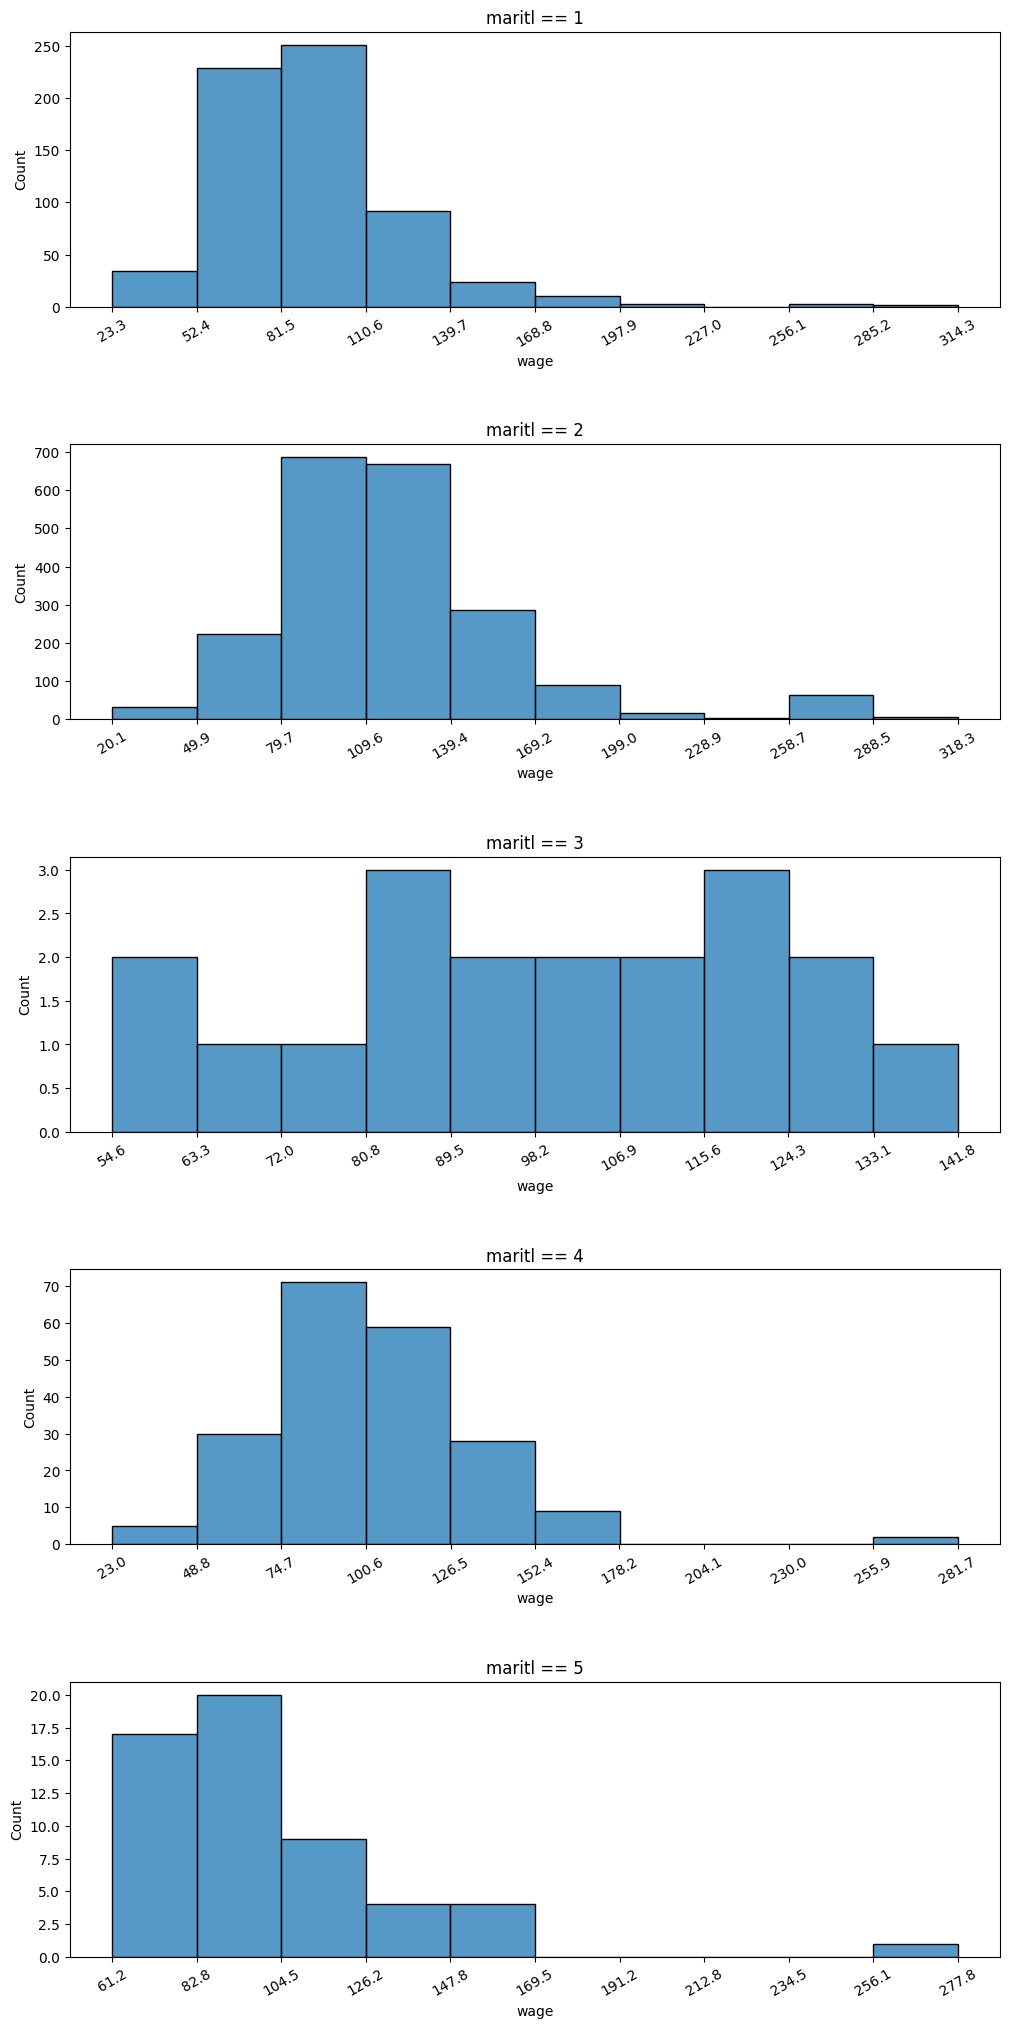

In [46]:
fig, ax = plt.subplots(len(vcount.index), 1, figsize=(12, 25))

fig.subplots_adjust(hspace=0.5)

for i, v in enumerate(vcount.index):
    mdf = cdf.query("maritl == @v")
    hist, bins = np.histogram(mdf['wage'], bins=10)
    bins = np.round(bins, 1)
    sb.histplot(data=mdf, x='wage', bins=10, ax=ax[i])
    ax[i].set_title('maritl == %d' % v)
    ax[i].set_xticks(bins)
    ax[i].set_xticklabels(bins, rotation=30)

plt.show()
plt.close()

## 문제 6

교육 수준에 따른 임금에 대한 히스토그램을 시각화 하고 설명하시오. 교육수준별로 그래프를 나누어 서브플롯으로 제시해야 합니다.

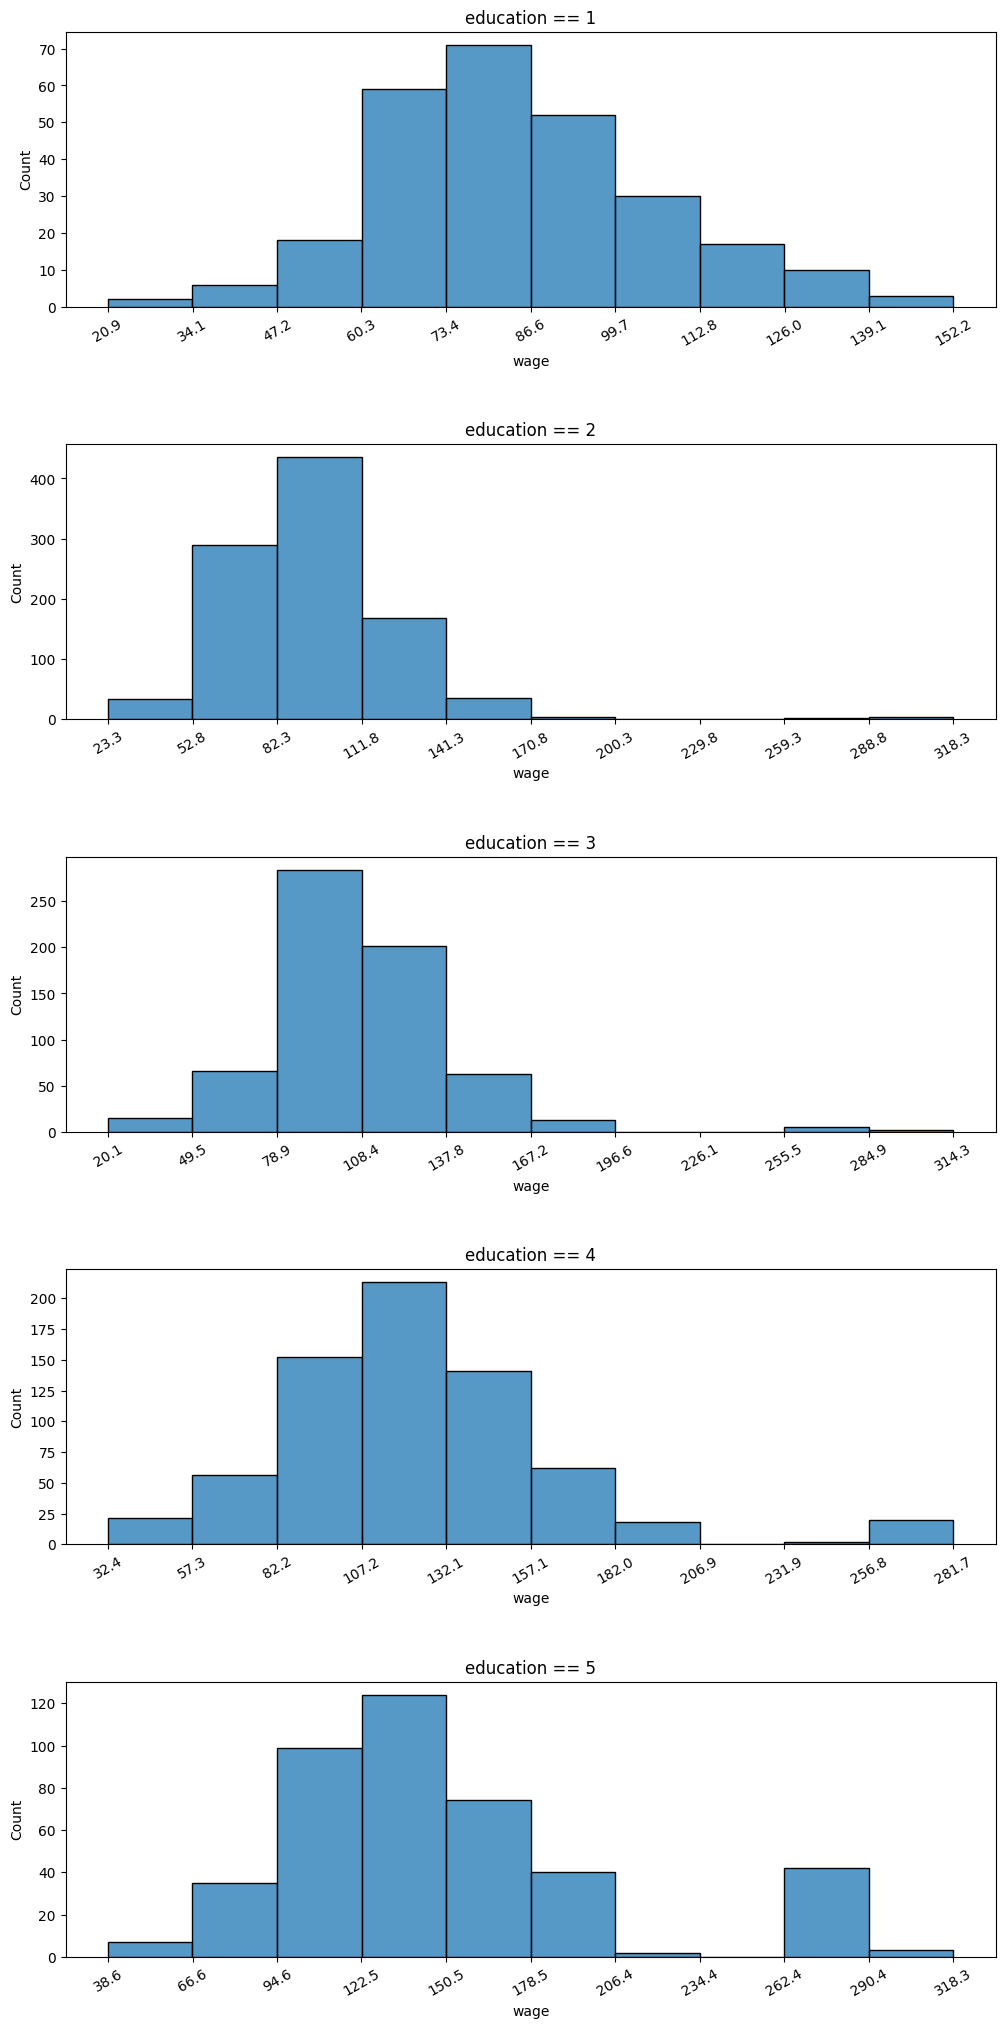

In [47]:
vcount = cdf['education'].value_counts().sort_index()

fig, ax = plt.subplots(len(vcount.index), 1, figsize=(12, 25))

fig.subplots_adjust(hspace=0.5)

for i, v in enumerate(vcount.index):
    mdf = cdf.query("education == @v")
    hist, bins = np.histogram(mdf['wage'], bins=10)
    bins = np.round(bins, 1)
    sb.histplot(data=mdf, x='wage', bins=10, ax=ax[i])
    ax[i].set_title('education == %d' % v)
    ax[i].set_xticks(bins)
    ax[i].set_xticklabels(bins, rotation=30)

plt.show()
plt.close()

## 문제 7.

직군별 건강상태를 확인하고자 한다. 적절한 형태로 데이터를 재배치하고 설명하시오.

### 풀이 (1)

In [51]:
hdf = cdf.filter(['jobclass', 'health', 'age'])
hdf

,jobclass,health,age
0,1,1,18
1,2,2,24
2,1,1,45
3,2,2,43
4,2,1,50
...,...,...,...
2995,1,2,44
2996,1,2,30
2997,1,1,27
2998,1,2,27


In [52]:
pivot_table(hdf, index='jobclass', columns='health', aggfunc='count')

age      
health      1     2
jobclass           
1         487  1057
2         371  1085

#### 풀이2 - 교차표 활용

In [54]:
hdf2 = cdf.filter(['jobclass', 'health'])
hdf2

,jobclass,health
0,1,1
1,2,2
2,1,1
3,2,2
4,2,1
...,...,...
2995,1,2
2996,1,2
2997,1,1
2998,1,2


In [56]:
crosstab(index=hdf2['jobclass'], columns=hdf2['health'],
         rownames=['직군'], colnames=['건강상태'], margins=True)

건강상태,1,2,All
직군,,,
1,487,1057,1544
2,371,1085,1456
All,858,2142,3000


## 문제 8

교육 수준을 인종 비율에 따라 설명하고자 한다. 적절한 시각화 자료를 제시하고 설명하시오.

In [58]:
edf = cdf.filter(['education', 'race'])
edf

,education,race
0,1,1
1,4,1
2,3,1
3,4,3
4,2,1
...,...,...
2995,3,1
2996,2,1
2997,1,2
2998,3,1


### 풀이 1 - catplot 사용

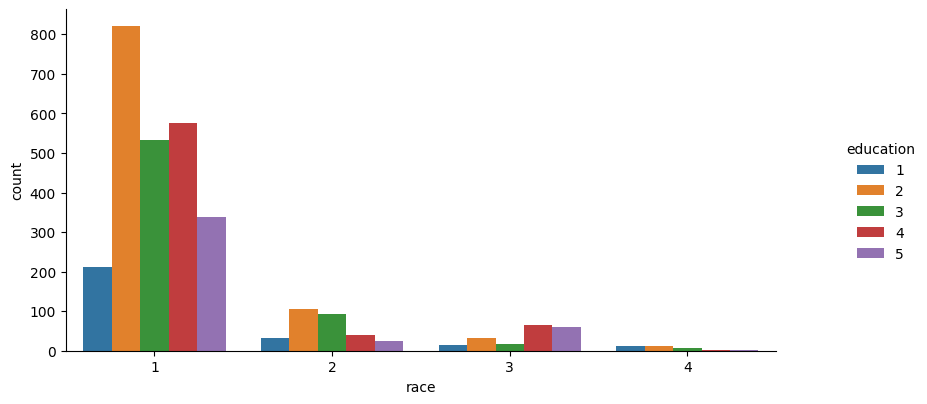

In [64]:
g = sb.catplot(data=edf, x='race', hue='education', kind="count")
g.fig.set_figwidth(10)
g.fig.set_figheight(4)
plt.show()
plt.close()

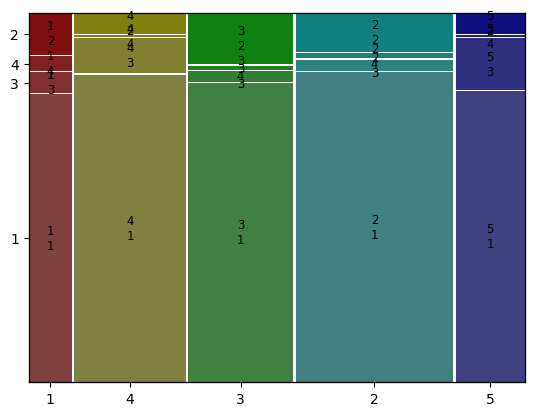

In [65]:
mosaic(edf, ['education', 'race'])
plt.show()
plt.close()